# Анализ белгородских мест общесвтенного питания

### Анализ производится из данных, которые удалось собрать при парсинге yandex карт

In [2]:
import numpy as np 
import pandas as pd 
import scipy.stats as sts 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('data/belgorod_food_places.csv', index_col='name')
df.head()

,Unnamed: 0,adress,rait,rait_count,link,closing_time,category
name,,,,,,,
Farfor,0,"Харьковский пер., 36Д, Белгород",4.3,391 оценка,https://yandex.ru/maps/org/farfor/73233893783,Открыто до 23:00,Доставка еды и обедов
Перчини Grill&Wine,1,"просп. Славы, 90А, Белгород",4.5,(2416),https://yandex.ru/maps/org/perchini_grill_wine...,Открыто до 23:00,Ресторан
Ниндзя ФУД,2,"ул. Костюкова, 39, Белгород",4.7,(651),https://yandex.ru/maps/org/nindzya_fud/1868725...,Открыто до 23:00,Кафе
Дао,3,"Харьковская ул., 3, Белгород, этаж 1",4.4,407 оценок,https://yandex.ru/maps/org/dao/17169128887,Открыто до 22:00,Ресторан
Тшм,4,"Белгородский просп., 93, Белгород",3.7,239 оценок,https://yandex.ru/maps/org/tshm/190737174920,Круглосуточно,Быстрое питание


## Колонки 
* *name* - наименование заведения общественного питания 

* *Unnamed* - будел удалена

* *adress* - адрес заведения

* *rait* - рейтинг заведения по 5-ти балльной шкале

* *rait_count* - количесвто оценок

* *link* - ссылка на заведение в яндекс картах

* *closing_time* - время закрытия

* *category* - категория зведения  

In [4]:
df = df.drop(df.columns[[0]], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, Farfor to Кафе шашлычная Сытое пузо
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adress        213 non-null    object 
 1   rait          212 non-null    float64
 2   rait_count    212 non-null    object 
 3   link          212 non-null    object 
 4   closing_time  215 non-null    object 
 5   category      213 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.8+ KB


In [6]:
df.describe()

,rait
count,212.000000
mean,4.306132
std,0.448917
min,1.600000
25%,4.100000
50%,4.300000
75%,4.500000
max,5.000000


In [7]:
df.describe(include='object')

,adress,rait_count,link,closing_time,category
count,213,212,212,215,213
unique,194,185,210,28,19
top,"ул. Победы, 71, Белгород",153 оценки,https://yandex.ru/maps/org/farfor/73233893783,Открыто до 23:00,Быстрое питание
freq,3,4,2,43,56


In [8]:
df.rait.value_counts()

rait
4.3    30
4.4    30
4.1    23
4.2    23
4.5    19
4.0    17
5.0    13
4.9    10
4.7     9
3.9     9
4.8     8
4.6     7
3.8     5
3.7     2
3.6     2
3.4     1
1.6     1
2.0     1
2.2     1
2.7     1
Name: count, dtype: int64

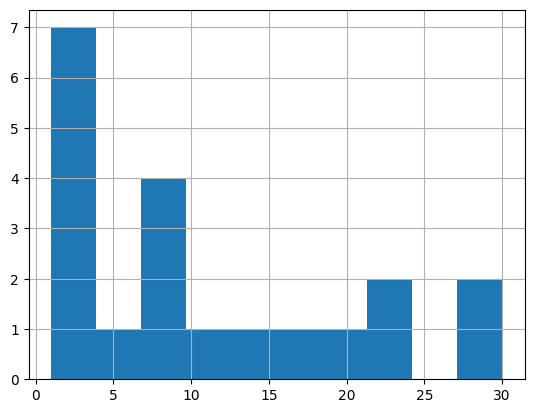

In [9]:
df.rait.value_counts().hist();

In [10]:
df.closing_time.value_counts()

closing_time
Открыто до 23:00           43
Открыто до 22:00           42
Открыто до 00:00           25
Круглосуточно              21
Открыто до 20:00           18
Открыто до 21:00           13
Открыто до 22:30            7
График работы не указан     6
Закрыто до завтра           6
Открыто до 21:30            4
Открыто до 17:00            4
Открыто до 22:45            3
Открыто до 01:00            3
Открыто до 18:00            2
До закрытия 30 мин          2
Открыто до 02:00            2
Организация переехала       2
Закрыто до 20:00            2
Открыто до 01:45            1
Открыто до 21:45            1
Открыто до 23:30            1
Открыто до 00:02            1
Открыто до 21:41            1
До открытия 30 мин          1
Открыто до 21:40            1
Открыто до четверга         1
Временно не работает        1
Открыто до 19:00            1
Name: count, dtype: int64

In [11]:
df.category.value_counts()

category
Быстрое питание                         56
Кафе                                    30
Доставка еды и обедов                   28
Ресторан                                28
Пиццерия                                18
Суши-бар                                14
Бар, паб                                 8
Кофейня                                  8
Столовая                                 4
Магазин кулинарии                        3
Караоке-клуб                             2
Кондитерская                             2
Диетические и диабетические продукты     2
Магазин суши и роллов                    2
Магазин пива                             2
Магазин продуктов                        2
Пекарня                                  2
Кейтеринг                                1
Комбинат питания                         1
Name: count, dtype: int64

In [12]:
df.rait.isnull().sum()

np.int64(3)

In [13]:
df[df['rait'].isnull()]

,adress,rait,rait_count,link,closing_time,category
name,,,,,,
Обеды в офис г. Белгород,"ул. 60 лет Октября, 2В, 10-й микрорайон, Белгород",NaN,NaN,NaN,Организация переехала,Доставка еды и обедов
Кебаб,"Привольная ул., 1А, Белгород",NaN,NaN,NaN,Круглосуточно,Быстрое питание
Принц Пирогов,"Гражданский просп., 18, Белгород",NaN,NaN,NaN,Организация переехала,Пекарня


## Думая можно выбросить из датасета данных сомнительные заведения

In [14]:
df = df[~df['rait'].isnull()]
df['rait'] = df['rait'].astype(float)
df.rait.isnull().sum()

np.int64(0)

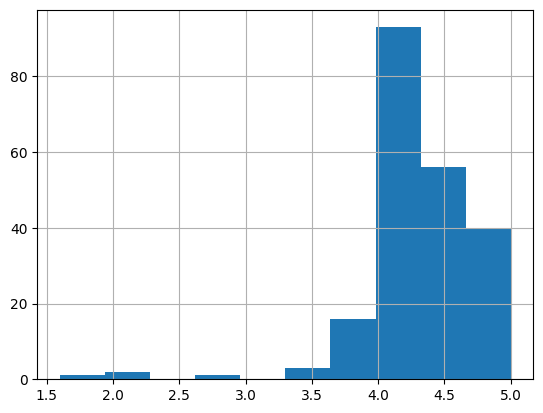

In [15]:
df = df[~df['rait'].isnull()]
df['rait'] = df['rait'].astype(float)
df.rait.hist();

## Теперь приведем в порядок время закрытия

### Избавимся от выбросов в виде "оргинизация переехала", "закрыто до четверга" и т.п.


In [16]:
bad_data = [
    'График работы не указан', 'Закрыто до завтра', 
    'До закрытия 30 мин', 'Организация переехала',
    'Закрыто до 20:00', 'До открытия 30 мин', 
    'Открыто до четверга', 'Временно не работает'
]

df = df[~df['closing_time'].isin(bad_data)]

def convert_to_time(closing_time):
    if closing_time == "Круглосуточно":
        return pd.to_datetime("12:12", format="%H:%M").time()
    
    elif "Открыто до" in closing_time:
        time_str = closing_time.split(" ")[-1]
        return pd.to_datetime(time_str, format="%H:%M").time()
    
    return None

df['closing_time'] = df['closing_time'].apply(convert_to_time)

df = df.dropna()

df['closing_time'] = df['closing_time'].apply(lambda x: x.strftime('%H:%M'))

print(df['closing_time'].value_counts())


closing_time
23:00    43
22:00    42
00:00    25
12:12    20
20:00    17
21:00    10
22:30     7
21:30     4
17:00     4
22:45     3
01:00     3
02:00     2
18:00     2
23:30     1
01:45     1
21:45     1
00:02     1
21:41     1
21:40     1
19:00     1
Name: count, dtype: int64


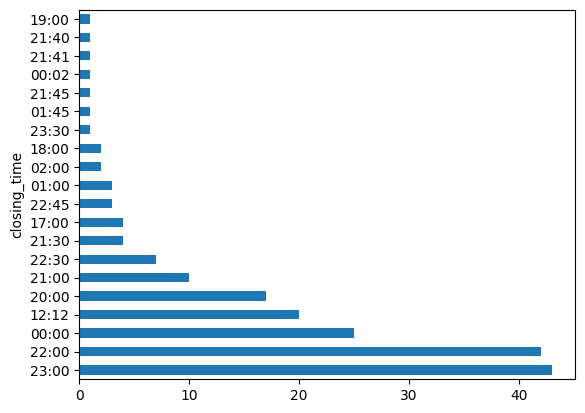

In [17]:
df.closing_time.value_counts().plot(kind='barh');

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, Farfor to Кафе шашлычная Сытое пузо
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adress        189 non-null    object 
 1   rait          189 non-null    float64
 2   rait_count    189 non-null    object 
 3   link          189 non-null    object 
 4   closing_time  189 non-null    object 
 5   category      189 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


## Теперь приведем порядок количество оценок

In [19]:
def parse_rait_count(rait_count):
    res = ""
    for ch in rait_count:
        if ch.isdigit():
            res += ch
            
    return int(res) if len(res) > 0 else None

df['rait_count'] = df['rait_count'].apply(parse_rait_count)
df.rait_count.value_counts()

rait_count
153     4
118     3
391     3
13      3
2416    2
       ..
110     1
293     1
133     1
8       1
9       1
Name: count, Length: 165, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, Farfor to Кафе шашлычная Сытое пузо
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adress        189 non-null    object 
 1   rait          189 non-null    float64
 2   rait_count    189 non-null    int64  
 3   link          189 non-null    object 
 4   closing_time  189 non-null    object 
 5   category      189 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.3+ KB


In [21]:
df.rait_count.isnull().sum()

np.int64(0)

### Проанализируем зависимость рейтинга от количества оценок

#### Для этого отобразим взаимосвязь с помощью точечного графика

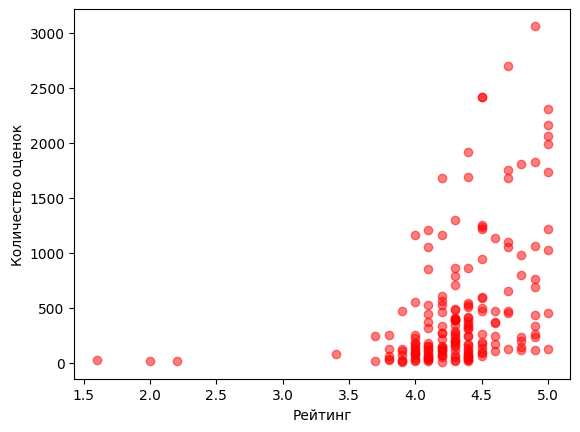

In [22]:
plt.scatter(df.rait, df.rait_count, color='red', alpha=0.5)
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок');

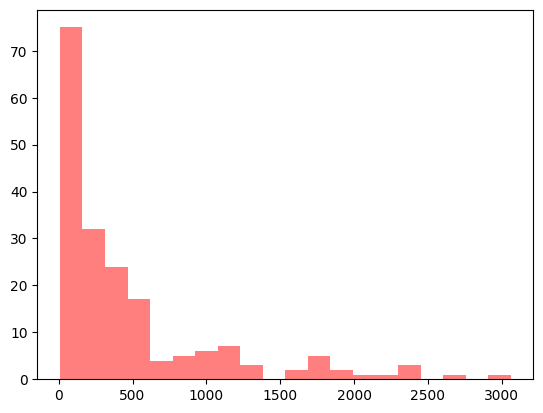

In [23]:
plt.hist(df.rait_count, bins=20, color='red', alpha=0.5);

### Наблюдаем длинный хвост. Переведем в логарифмический масштаб

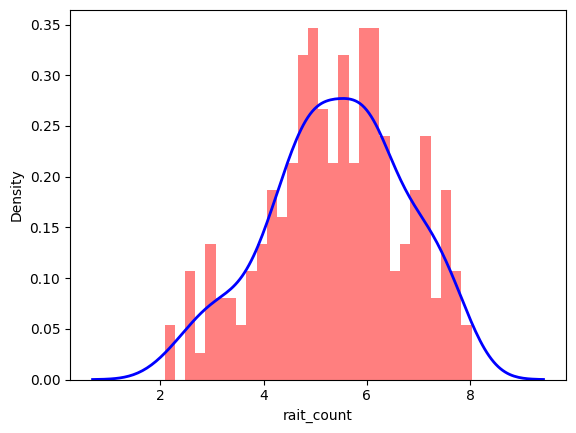

In [24]:
log_values = df.rait_count.apply(np.log)

plt.hist(log_values, bins=30, color='red', alpha=0.5, density=True)

sns.kdeplot(log_values, color='blue', linewidth=2);

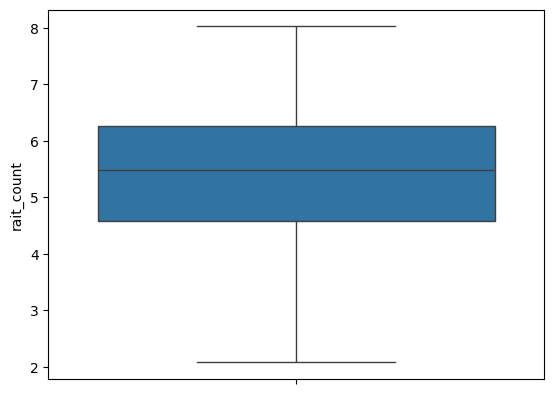

In [25]:
sns.boxplot(df.rait_count.apply(np.log));

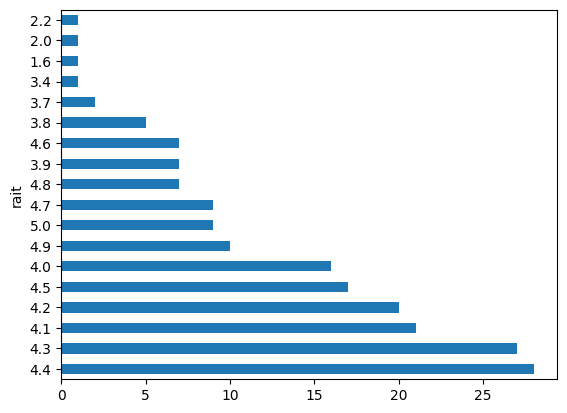

In [26]:
df.rait.value_counts().plot(kind='barh');

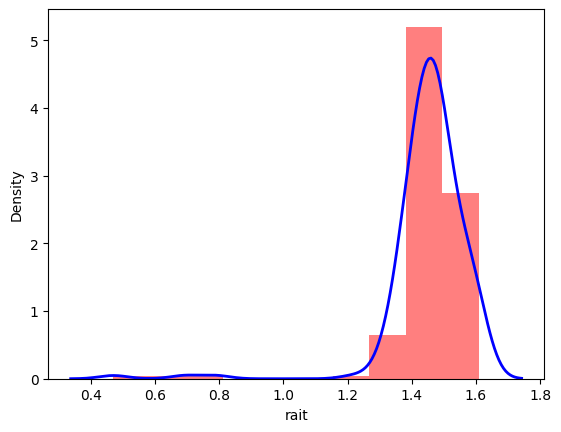

In [27]:
log_values = df.rait.apply(np.log)

plt.hist(log_values, bins=10, color='red', alpha=0.5, density=True)

sns.kdeplot(log_values, color='blue', linewidth=2);

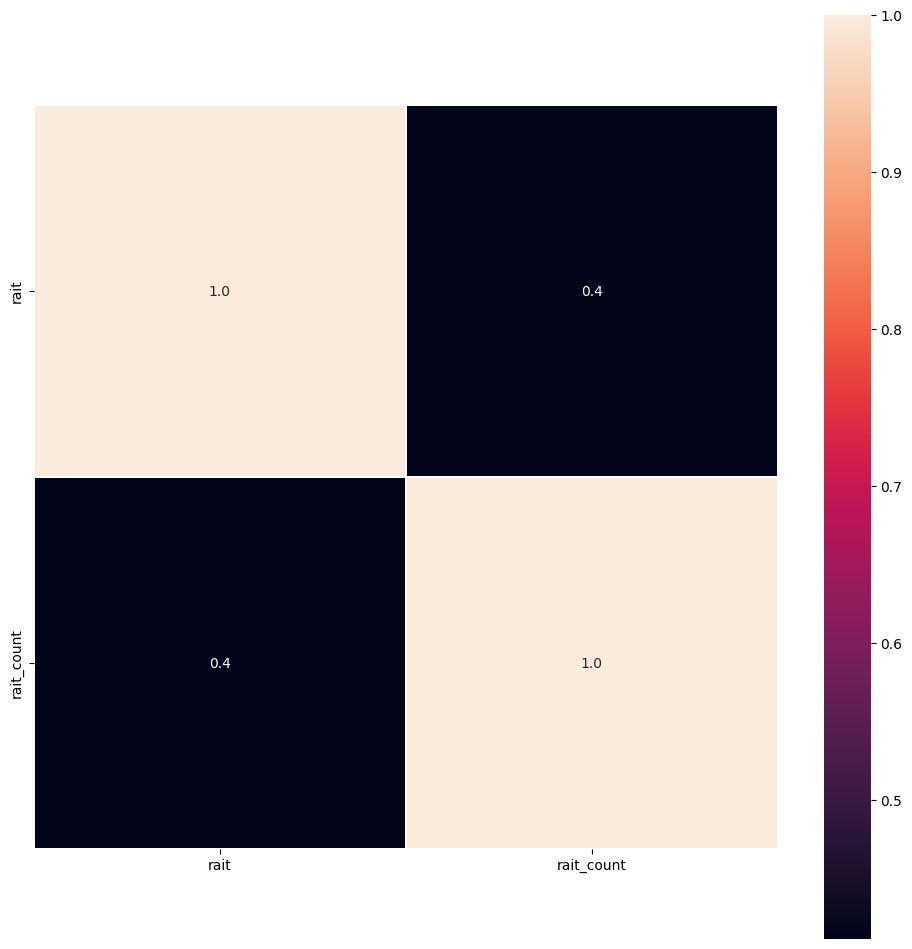

In [28]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.subplots(figsize=(12, 12))
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1);

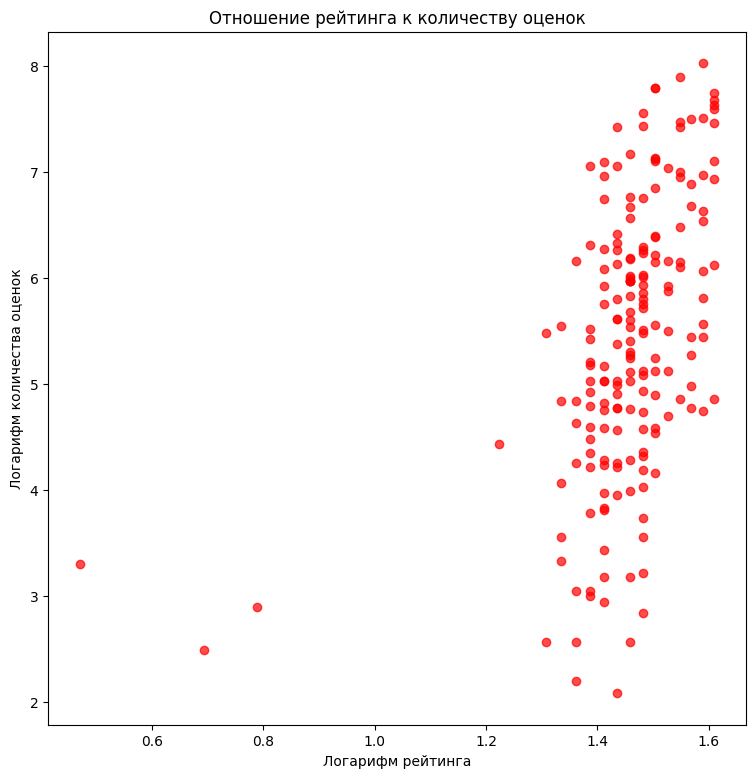

In [29]:
plt.figure(figsize=(9, 9))
plt.scatter(np.log(df.rait), np.log(df.rait_count), color='red', alpha=0.7)
plt.title("Отношение рейтинга к количеству оценок")
plt.xlabel("Логарифм рейтинга")
plt.ylabel("Логарифм количества оценок")
plt.show()

In [30]:
df_sort = df.sort_values(by='rait', ascending=False, inplace=True)
df[:30]

,adress,rait,rait_count,link,closing_time,category
name,,,,,,
Сидрерия,"ул. Костюкова, 36Г, Белгород, БЦ Владимирский,...",5.0,2162,https://yandex.ru/maps/org/sidreriya/35871937040,00:00,"Бар, паб"
Forest grill,"Гражданский просп., 34, Белгород",5.0,2059,https://yandex.ru/maps/org/forest_grill/126721...,00:00,Ресторан
Кофе и Баббл Ти,"ул. Победы, 104, Белгород",5.0,457,https://yandex.ru/maps/org/kofe_i_babbl_ti/962...,21:00,Кофейня
Кулинария,"просп. Славы, 47, Белгород, этаж 1",5.0,1986,https://yandex.ru/maps/org/kulinariya/1088408839,21:00,Магазин кулинарии
Барашек,"Корочанская ул., 39В, Белгород",5.0,2309,https://yandex.ru/maps/org/barashek/33147398141,00:00,Ресторан
Мидийное место,"ул. Попова, 36, Белгород",5.0,1027,https://yandex.ru/maps/org/midiynoye_mesto/621...,23:00,Ресторан
Кофе Вино,"ул. Мичурина, 52, Белгород, этаж 1",5.0,1214,https://yandex.ru/maps/org/kofe_vino/220415394217,23:00,Кофейня
Ташир Пицца,"просп. Богдана Хмельницкого, 137Т, Белгород, Т...",5.0,129,https://yandex.ru/maps/org/tashir_pitstsa/1149...,22:00,Пиццерия
Комод,"ул. Костюкова, 69, Белгород, этаж 1",5.0,1736,https://yandex.ru/maps/org/komod/1774277670,23:00,Кофейня


In [31]:
df[(df['rait'] >= 4.5) & (df['rait_count'] >= 1000)]

,adress,rait,rait_count,link,closing_time,category
name,,,,,,
Сидрерия,"ул. Костюкова, 36Г, Белгород, БЦ Владимирский,...",5.0,2162,https://yandex.ru/maps/org/sidreriya/35871937040,00:00,"Бар, паб"
Forest grill,"Гражданский просп., 34, Белгород",5.0,2059,https://yandex.ru/maps/org/forest_grill/126721...,00:00,Ресторан
Кулинария,"просп. Славы, 47, Белгород, этаж 1",5.0,1986,https://yandex.ru/maps/org/kulinariya/1088408839,21:00,Магазин кулинарии
Барашек,"Корочанская ул., 39В, Белгород",5.0,2309,https://yandex.ru/maps/org/barashek/33147398141,00:00,Ресторан
Мидийное место,"ул. Попова, 36, Белгород",5.0,1027,https://yandex.ru/maps/org/midiynoye_mesto/621...,23:00,Ресторан
Кофе Вино,"ул. Мичурина, 52, Белгород, этаж 1",5.0,1214,https://yandex.ru/maps/org/kofe_vino/220415394217,23:00,Кофейня
Комод,"ул. Костюкова, 69, Белгород, этаж 1",5.0,1736,https://yandex.ru/maps/org/komod/1774277670,23:00,Кофейня
Лес и Лис,"Волчанская ул., 292Б, Белгород, этаж 1",4.9,3061,https://yandex.ru/maps/org/les_i_lis/60532692927,23:00,Ресторан
Pitnica,"Преображенская ул., 86, Белгород",4.9,1822,https://yandex.ru/maps/org/pitnica/87837556709,00:00,"Бар, паб"


In [32]:
df[df['category'] == 'Быстрое питание'][:30]

,adress,rait,rait_count,link,closing_time,category
name,,,,,,
Белшашлык,"ул. Попова, 76А, Белгород",4.7,469,https://yandex.ru/maps/org/belshashlyk/4382647...,12:12,Быстрое питание
Восточный Смак,"Корочанская ул., 493А, Белгород",4.7,1756,https://yandex.ru/maps/org/vostochny_smak/1752...,12:12,Быстрое питание
Вкусно — и точка,"просп. Богдана Хмельницкого, 160А, Белгород",4.5,1218,https://yandex.ru/maps/org/vkusno_i_tochka/337...,22:00,Быстрое питание
Восточное бистро,"Белгородский просп., 87А, корп. 2, Белгород",4.5,467,https://yandex.ru/maps/org/vostochnoye_bistro/...,02:00,Быстрое питание
Вкусно — и точка,"ул. Щорса, 64, Белгород",4.4,1688,https://yandex.ru/maps/org/vkusno_i_tochka/115...,20:00,Быстрое питание
Бургер Кинг,"ул. Щорса, 64, микрорайон Пригородный, посёлок...",4.4,1913,https://yandex.ru/maps/org/burger_king/2097118...,22:00,Быстрое питание
Шашлык31.рф,"Промышленная ул., 15, Белгород",4.4,97,https://yandex.ru/maps/org/shashlyk31_rf/22020...,22:00,Быстрое питание
Вкусно — и точка,"просп. Богдана Хмельницкого, 137Т, Белгород, э...",4.4,139,https://yandex.ru/maps/org/vkusno_i_tochka/665...,23:00,Быстрое питание
Смак Восточный,"Сумская ул., 70В, Белгород",4.4,332,https://yandex.ru/maps/org/smak_vostochny/1939...,12:12,Быстрое питание


In [33]:
dict_category = dict(df.category.value_counts())
dict_category

{'Быстрое питание': np.int64(50),
 'Кафе': np.int64(29),
 'Ресторан': np.int64(26),
 'Доставка еды и обедов': np.int64(24),
 'Пиццерия': np.int64(17),
 'Суши-бар': np.int64(14),
 'Кофейня': np.int64(7),
 'Бар, паб': np.int64(6),
 'Магазин кулинарии': np.int64(3),
 'Столовая': np.int64(2),
 'Магазин суши и роллов': np.int64(2),
 'Кондитерская': np.int64(2),
 'Магазин пива': np.int64(2),
 'Пекарня': np.int64(1),
 'Кейтеринг': np.int64(1),
 'Диетические и диабетические продукты': np.int64(1),
 'Магазин продуктов': np.int64(1),
 'Комбинат питания': np.int64(1)}

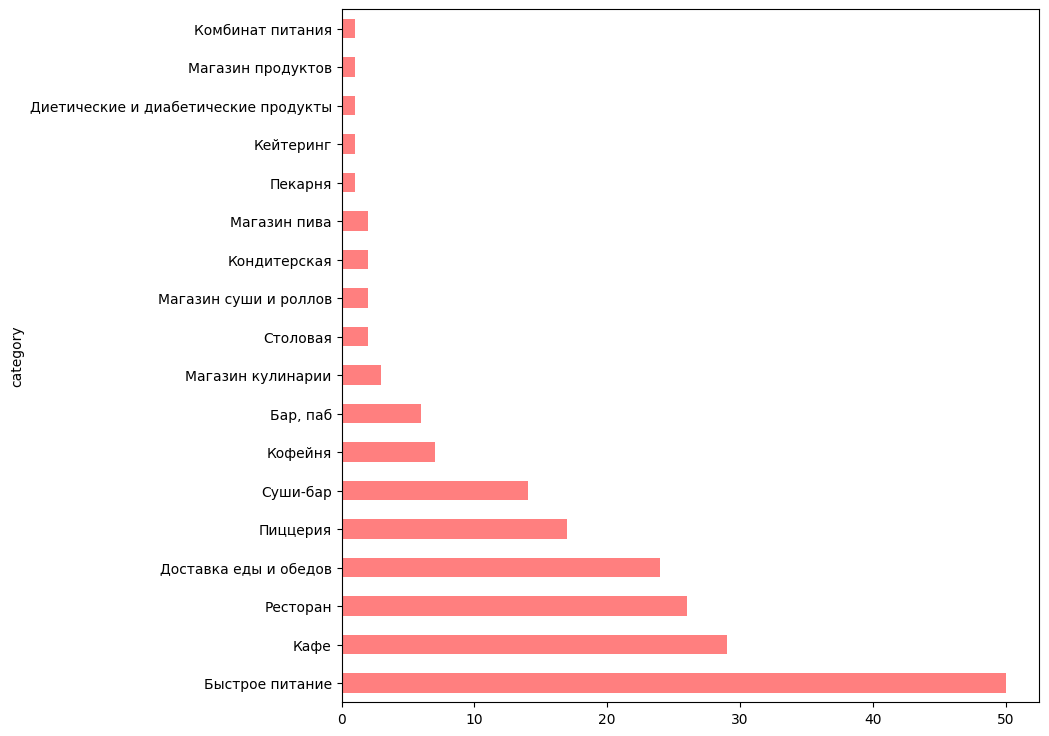

In [34]:
plt.figure(figsize=(9, 9))
df.category.value_counts().plot(kind='barh', color='red', alpha=0.5);

In [35]:
bad_data = []

def parse_category(category):
    for key, value in category.items(): 
        if value < 5 or key == 'Бар, паб':
            bad_data.append(key) 
            
parse_category(dict_category)
bad_data

['Бар, паб',
 'Магазин кулинарии',
 'Столовая',
 'Магазин суши и роллов',
 'Кондитерская',
 'Магазин пива',
 'Пекарня',
 'Кейтеринг',
 'Диетические и диабетические продукты',
 'Магазин продуктов',
 'Комбинат питания']

In [36]:
clear_df = df[~df['category'].isin(bad_data)]

clear_df.category.value_counts()

category
Быстрое питание          50
Кафе                     29
Ресторан                 26
Доставка еды и обедов    24
Пиццерия                 17
Суши-бар                 14
Кофейня                   7
Name: count, dtype: int64

### Выбирем самые лучшие заведения. Будем считать лучшим те, у которых рейтинг больше 4.5 и больше 120 оценок

In [37]:
best_df = clear_df[(clear_df['rait'] >= 4.5) & (clear_df['rait_count'] >= 120)]
best_df.count()

adress          45
rait            45
rait_count      45
link            45
closing_time    45
category        45
dtype: int64

#### Всего 45 заведений. Посмтрим на их категории

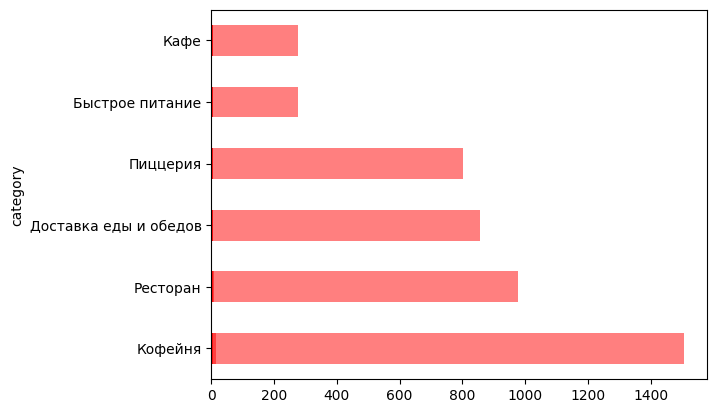

In [38]:
best_df.category.value_counts().plot(kind='barh', color='red', alpha=0.5);
best_df.groupby('category')['rait'].mean().sort_values(ascending=False).plot(kind='barh', color='red', alpha=0.5);
best_df.groupby('category')['rait_count'].mean().sort_values(ascending=False).plot(kind='barh', color='red', alpha=0.5);
best_df.groupby('category')['rait'].mean().sort_values(ascending=False)
best_df.groupby('category')['rait_count'].mean().sort_values(ascending=False)
best_df.groupby('category')['rait'].mean().sort_values(ascending=False).plot(kind='barh', color='red', alpha=0.5);

In [39]:
best_df.category.value_counts()

category
Ресторан                 16
Доставка еды и обедов     9
Кафе                      6
Кофейня                   5
Пиццерия                  5
Быстрое питание           4
Name: count, dtype: int64

In [40]:
best_df.groupby('category')['rait'].mean().sort_values

<bound method Series.sort_values of category
Быстрое питание          4.600000
Доставка еды и обедов    4.744444
Кафе                     4.583333
Кофейня                  4.880000
Пиццерия                 4.660000
Ресторан                 4.756250
Name: rait, dtype: float64>

#### Получается, что наибольший средний рейтинг у кофейнь, ресторанов и доставок еды и обедов 

In [41]:
best_df.sort_values(by='rait', ascending=False)

,adress,rait,rait_count,link,closing_time,category
name,,,,,,
Forest grill,"Гражданский просп., 34, Белгород",5.0,2059,https://yandex.ru/maps/org/forest_grill/126721...,00:00,Ресторан
Кофе и Баббл Ти,"ул. Победы, 104, Белгород",5.0,457,https://yandex.ru/maps/org/kofe_i_babbl_ti/962...,21:00,Кофейня
Барашек,"Корочанская ул., 39В, Белгород",5.0,2309,https://yandex.ru/maps/org/barashek/33147398141,00:00,Ресторан
Мидийное место,"ул. Попова, 36, Белгород",5.0,1027,https://yandex.ru/maps/org/midiynoye_mesto/621...,23:00,Ресторан
Кофе Вино,"ул. Мичурина, 52, Белгород, этаж 1",5.0,1214,https://yandex.ru/maps/org/kofe_vino/220415394217,23:00,Кофейня
Ташир Пицца,"просп. Богдана Хмельницкого, 137Т, Белгород, Т...",5.0,129,https://yandex.ru/maps/org/tashir_pitstsa/1149...,22:00,Пиццерия
Комод,"ул. Костюкова, 69, Белгород, этаж 1",5.0,1736,https://yandex.ru/maps/org/komod/1774277670,23:00,Кофейня
Лес и Лис,"Волчанская ул., 292Б, Белгород, этаж 1",4.9,3061,https://yandex.ru/maps/org/les_i_lis/60532692927,23:00,Ресторан
ПАРА-пицца,"ул. Горького, 76А, Белгород",4.9,262,https://yandex.ru/maps/org/para_pitstsa/866919...,22:00,Доставка еды и обедов


## Таким образом, быда собрана статистика по лучшим заведениям общественного питания в Белгороде. Благодоря подготовленному датасету можно найти подходящее место для любого рода мероприятий.

In [42]:
clear_df.to_csv('data/belgorod_food_places_clean.csv', index=False, encoding='utf-8')

## Проведем кластеризацию объектов

In [43]:
!pip install scikit-learn

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

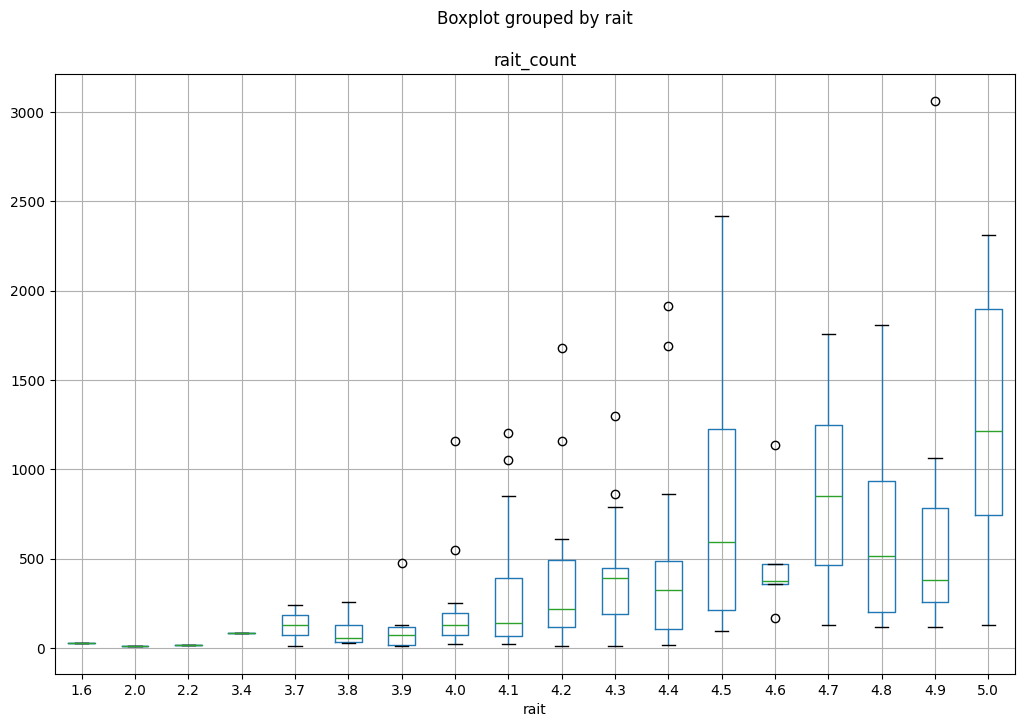

In [45]:
clear_df.boxplot(column='rait_count', by='rait', figsize=(12,8));

In [46]:
clear_df = clear_df[clear_df['rait'] >= 4.0]

In [47]:
features = ['rait', 'rait_count']

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(clear_df[features]), columns=features)

data_scaled.head()

,rait,rait_count
0,1.0,0.671798
1,1.0,0.147068
2,1.0,0.753685
3,1.0,0.333770
4,1.0,0.395021


Text(0.5, 1.0, 'Correlation Matrix')

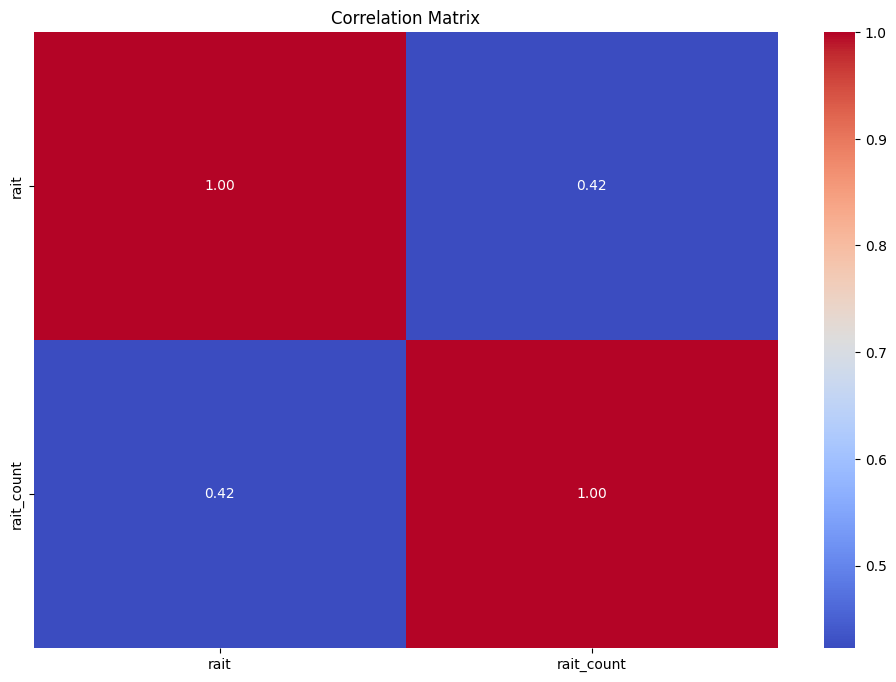

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Dendogram')

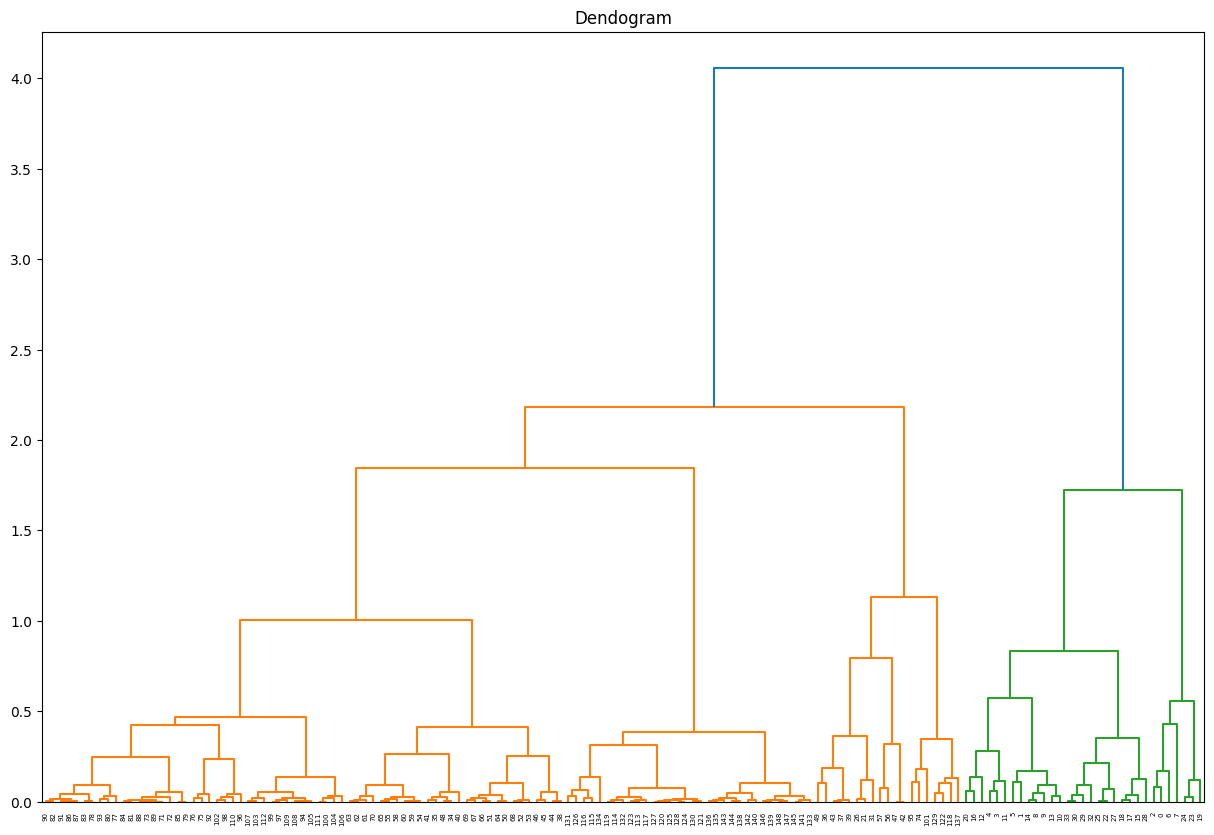

In [49]:
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendogram')

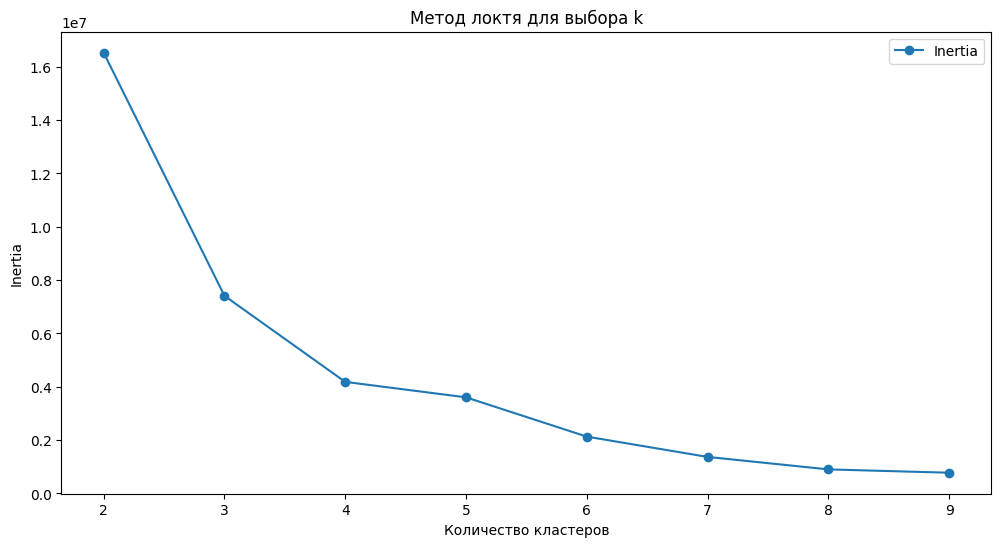

In [50]:
inertia = []
sil_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df[features])
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df[features], clusters))

# Визуализация метода локтя
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia, '-o', label='Inertia')
plt.title('Метод локтя для выбора k')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.legend();

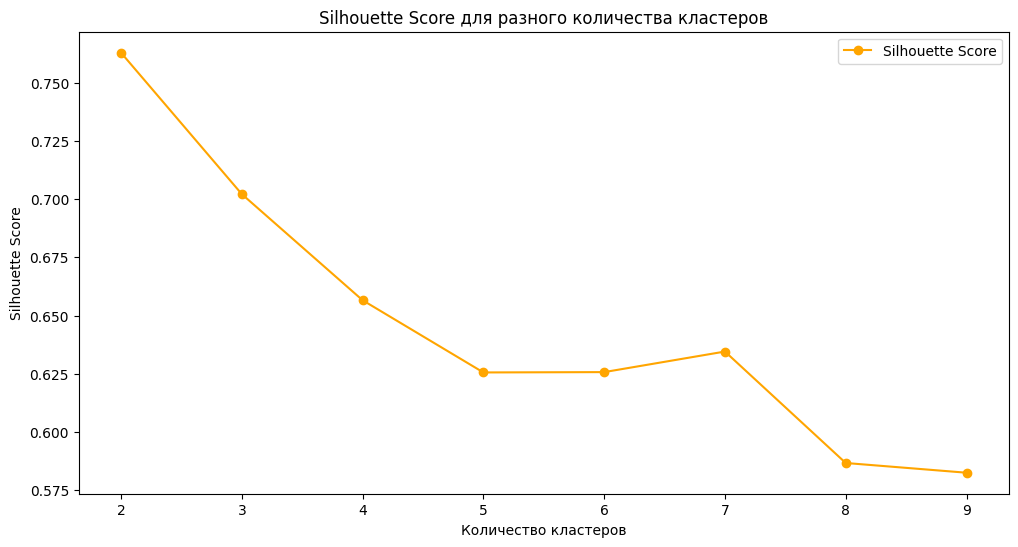

In [51]:
# Silhouette Score для разных k
plt.figure(figsize=(12, 6))
plt.plot(k_values, sil_scores, '-o', color='orange', label='Silhouette Score')
plt.title('Silhouette Score для разного количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.legend();

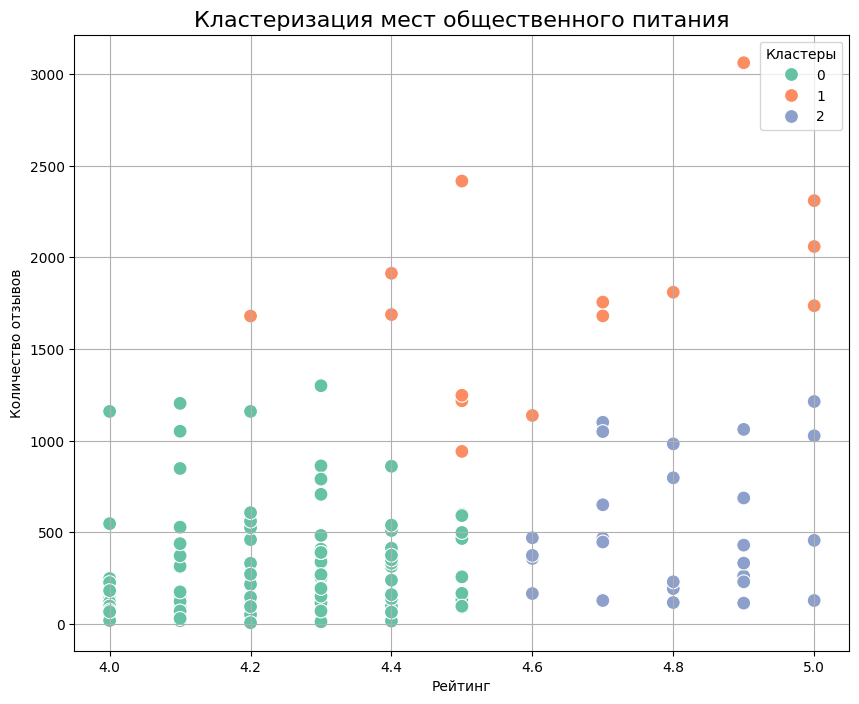

In [52]:
kmeans = KMeans(n_clusters=3, random_state=42)
clear_df['Cluster_KMeans'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=clear_df['rait'], y=clear_df['rait_count'], hue=clear_df['Cluster_KMeans'], palette='Set2', s=100)
plt.title('Кластеризация мест общественного питания', fontsize=16)
plt.xlabel('Рейтинг')
plt.ylabel('Количество отзывов')
plt.grid(True)
plt.legend(title='Кластеры');

In [53]:
# Оценка кластеризации с использованием силуэта
silhouette_avg = silhouette_score(data_scaled, clear_df['Cluster_KMeans'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5307288501471907


In [54]:
db_score = davies_bouldin_score(data_scaled, clear_df['Cluster_KMeans'])
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 0.8711933410722846


In [55]:
cluster_summary = clear_df.groupby('Cluster_KMeans')[['rait', 'rait_count']].mean()
print(cluster_summary)

                    rait   rait_count
Cluster_KMeans                       
0               4.235849   303.018868
1               4.629412  1782.647059
2               4.803846   518.923077


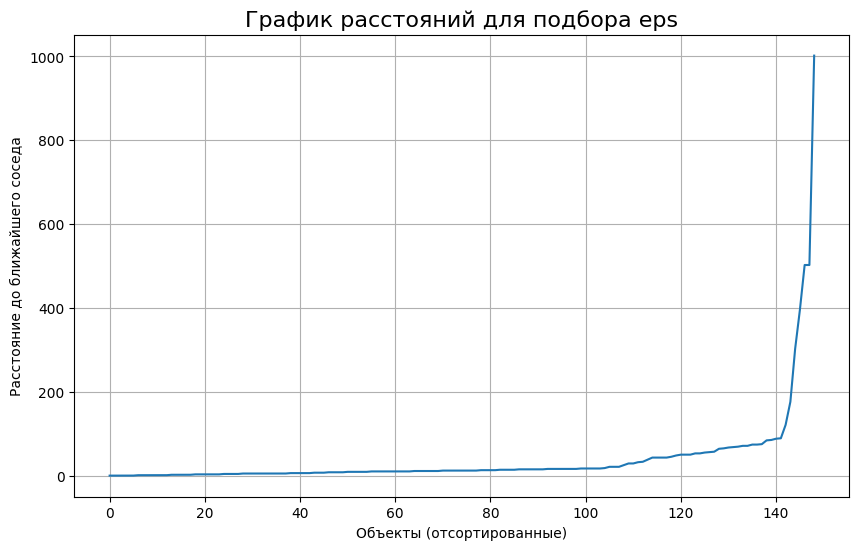

In [56]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(clear_df[features])
distances, indices = neighbors.kneighbors(clear_df[features])

# Сортировка и построение графика
distances = np.sort(distances[:, -1])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('График расстояний для подбора eps', fontsize=16)
plt.xlabel('Объекты (отсортированные)')
plt.ylabel('Расстояние до ближайшего соседа')
plt.grid(True)
plt.show()

In [57]:
dbscan = DBSCAN(eps=150, min_samples=5)
clusters_dbscan = dbscan.fit_predict(clear_df[features])

In [58]:
clear_df['Cluster_DBSCAN'] = clusters_dbscan

# Проверка количества кластеров и шумов
num_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
num_noise = list(clusters_dbscan).count(-1)

print(f"Количество кластеров: {num_clusters}")
print(f"Количество шумов: {num_noise}")

Количество кластеров: 2
Количество шумов: 5


In [59]:
# Вычисление метрик качества (только если есть больше одного кластера)
if num_clusters > 1:
    sil_score = silhouette_score(clear_df[features], clusters_dbscan)
    db_score = davies_bouldin_score(clear_df[features], clusters_dbscan)
    print(f"Silhouette Score: {sil_score}")
    print(f"Davies-Bouldin Index: {db_score}")
else:
    print("DBSCAN не выделил достаточно кластеров для вычисления метрик.")

Silhouette Score: 0.6672308755498877
Davies-Bouldin Index: 0.37441838766906566


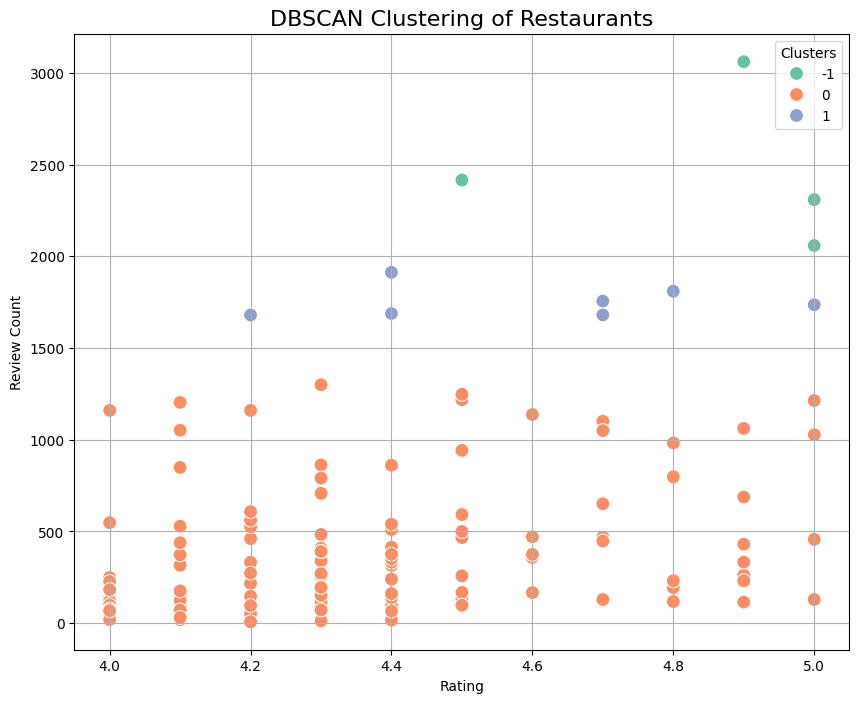

In [60]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=clear_df['rait'], y=clear_df['rait_count'], 
    hue=clear_df['Cluster_DBSCAN'], 
    palette='Set2', s=100
)
plt.title('DBSCAN Clustering of Restaurants', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.grid()
plt.legend(title='Clusters', loc='best', bbox_to_anchor=(1, 1));

In [64]:
cluster_summary = clear_df[clear_df['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN')[features].mean()
cluster_summary

,rait,rait_count
Cluster_DBSCAN,,
0,4.354015,375.124088
1,4.600000,1752.000000


In [62]:
clear_df[:10]

,adress,rait,rait_count,link,closing_time,category,Cluster_KMeans,Cluster_DBSCAN
name,,,,,,,,
Forest grill,"Гражданский просп., 34, Белгород",5.0,2059,https://yandex.ru/maps/org/forest_grill/126721...,00:00,Ресторан,1,-1
Кофе и Баббл Ти,"ул. Победы, 104, Белгород",5.0,457,https://yandex.ru/maps/org/kofe_i_babbl_ti/962...,21:00,Кофейня,2,0
Барашек,"Корочанская ул., 39В, Белгород",5.0,2309,https://yandex.ru/maps/org/barashek/33147398141,00:00,Ресторан,1,-1
Мидийное место,"ул. Попова, 36, Белгород",5.0,1027,https://yandex.ru/maps/org/midiynoye_mesto/621...,23:00,Ресторан,2,0
Кофе Вино,"ул. Мичурина, 52, Белгород, этаж 1",5.0,1214,https://yandex.ru/maps/org/kofe_vino/220415394217,23:00,Кофейня,2,0
Ташир Пицца,"просп. Богдана Хмельницкого, 137Т, Белгород, Т...",5.0,129,https://yandex.ru/maps/org/tashir_pitstsa/1149...,22:00,Пиццерия,2,0
Комод,"ул. Костюкова, 69, Белгород, этаж 1",5.0,1736,https://yandex.ru/maps/org/komod/1774277670,23:00,Кофейня,1,1
Лес и Лис,"Волчанская ул., 292Б, Белгород, этаж 1",4.9,3061,https://yandex.ru/maps/org/les_i_lis/60532692927,23:00,Ресторан,1,-1
ПАРА-пицца,"ул. Горького, 76А, Белгород",4.9,262,https://yandex.ru/maps/org/para_pitstsa/866919...,22:00,Доставка еды и обедов,2,0


In [63]:
clear_df.to_csv('data/clustered_restaurants.csv', index=False)